In [72]:
from __init__ import read_from_mongo, read_from_postgre, clubs_columns, competitions_columns
import seaborn as sns
from matplotlib import pyplot as plt

# Read data from MongoDB

In [73]:
players = read_from_mongo("players")
players.head()
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30302 entries, 0 to 30301
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          30302 non-null  object 
 1   first_name                   28337 non-null  object 
 2   last_name                    30302 non-null  object 
 3   last_season                  30302 non-null  object 
 4   player_code                  30302 non-null  object 
 5   country_of_birth             27613 non-null  object 
 6   city_of_birth                28099 non-null  object 
 7   country_of_citizenship       29759 non-null  object 
 8   date_of_birth                30255 non-null  object 
 9   sub_position                 30130 non-null  object 
 10  position                     30302 non-null  object 
 11  foot                         27913 non-null  object 
 12  height_in_cm                 28204 non-null  object 
 13  market_value_in_

In [74]:
appearances = read_from_mongo("appearances")

In [75]:
lineups = read_from_mongo("gamelineups")
lineups.head()

,_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,6574cca60a8453403824e55f,6574baea291260c74de25e9f,338,starting_lineup,89,6574baf3975bb4cdf6a05aee,Vladyslav Supryaga,False,Centre-Forward
1,6574cca60a8453403824e560,6574baea291260c74de25e9f,338,starting_lineup,10,6574baf3975bb4cdf6a05408,Mykola Shaparenko,False,Central Midfield
2,6574cca60a8453403824e561,6574baea291260c74de25e9f,338,starting_lineup,5,6574baf3975bb4cdf6a029a3,Sergiy Sydorchuk,True,Defensive Midfield
3,6574cca60a8453403824e562,6574baea291260c74de25e9f,338,starting_lineup,94,6574baf3975bb4cdf6a033c4,Tomasz Kedziora,False,Right-Back
4,6574cca60a8453403824e563,6574baea291260c74de25e9f,338,starting_lineup,16,6574baf3975bb4cdf6a05961,Vitaliy Mykolenko,False,Left-Back


In [76]:
games = read_from_mongo("games")

In [77]:
valuations = read_from_mongo("playervaluations")

In [78]:
rooms = read_from_mongo("rooms")

In [79]:
users = read_from_mongo("users")

# Read data from PostgreSQL

In [80]:
clubs = read_from_postgre("clubs")
#assign to clubs columns names the array clubs_columns
clubs.columns = clubs_columns
clubs.head()
clubs.info()
#change the type of the foreigner_percentage column from object to float
clubs["foreigners_percentage"] = clubs["foreigners_percentage"].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      426 non-null    int64  
 1   average_age              388 non-null    object 
 2   club_code                426 non-null    object 
 3   coach_name               0 non-null      object 
 4   domestic_competition_id  426 non-null    object 
 5   foreigners_number        426 non-null    object 
 6   foreigners_percentage    379 non-null    object 
 7   last_season              426 non-null    object 
 8   name                     426 non-null    object 
 9   national_team_players    426 non-null    object 
 10  net_transfer_record      426 non-null    object 
 11  squad_size               426 non-null    object 
 12  stadium_name             426 non-null    object 
 13  stadium_seats            426 non-null    object 
 14  total_market_value       4

In [81]:
competitions = read_from_postgre("competitions")
competitions.columns  = competitions_columns
competitions.head()

,competition_code,_id,confederation,country_id,country_name,domestic_league_code,name,sub_type,type,url
0,italy-cup,CIT,europa,75,Italy,IT1,italy-cup,domestic_cup,domestic_cup,https://www.transfermarkt.co.uk/italy-cup/star...
1,johan-cruijff-schaal,NLSC,europa,122,Netherlands,NL1,johan-cruijff-schaal,domestic_super_cup,other,https://www.transfermarkt.co.uk/johan-cruijff-...
2,kypello-elladas,GRP,europa,56,Greece,GR1,kypello-elladas,domestic_cup,domestic_cup,https://www.transfermarkt.co.uk/kypello-ellada...
3,supertaca-candido-de-oliveira,POSU,europa,136,Portugal,PO1,supertaca-candido-de-oliveira,domestic_super_cup,other,https://www.transfermarkt.co.uk/supertaca-cand...
4,russian-super-cup,RUSS,europa,141,Russia,RU1,russian-super-cup,domestic_super_cup,other,https://www.transfermarkt.co.uk/russian-super-...


# Storing in csvs

In [82]:
"""players.to_csv("current_datasets/players.csv")
appearances.to_csv("current_datasets/appearances.csv")
lineups.to_csv("current_datasets/lineups.csv")
games.to_csv("current_datasets/games.csv")
valuations.to_csv("current_datasets/valuations.csv")
rooms.to_csv("current_datasets/rooms.csv")
users.to_csv("current_datasets/users.csv")
clubs.to_csv("current_datasets/clubs.csv")
competitions.to_csv("current_datasets/competitions.csv")"""



'players.to_csv("current_datasets/players.csv")\nappearances.to_csv("current_datasets/appearances.csv")\nlineups.to_csv("current_datasets/lineups.csv")\ngames.to_csv("current_datasets/games.csv")\nvaluations.to_csv("current_datasets/valuations.csv")\nrooms.to_csv("current_datasets/rooms.csv")\nusers.to_csv("current_datasets/users.csv")\nclubs.to_csv("current_datasets/clubs.csv")\ncompetitions.to_csv("current_datasets/competitions.csv")'

In [83]:
dfs = {
    'players': players,
    'appearances': appearances,
    'lineups': lineups,
    'games': games,
    'valuations': valuations,
    'clubs': clubs,
    'competitions': competitions
}


# Data cleaning

In [84]:
import pandas as pd

# Create a dictionary to hold the dataframes


"""# Display the head of each dataframe
for df_name, df in dfs.items():
    print(f"Head of {df_name}:")
    print(df.head())"""

for df_name, df in dfs.items():
    # Drop 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    # Drop '__v' column if it exists
    if '__v' in df.columns:
        df.drop('__v', axis=1, inplace=True)
    # Convert 'createdAt' and 'updatedAt' to datetime if they exist
    if 'createdAt' in df.columns:
        df['createdAt'] = pd.to_datetime(df['createdAt'])
    if 'updatedAt' in df.columns:
        df['updatedAt'] = pd.to_datetime(df['updatedAt'])
    # Convert 'date' to datetime if it exists
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # Check for missing values
    missing_values = df.isnull().sum()
    print(f'Missing values in {df_name}:')
    print(missing_values[missing_values > 0])
    # Check data types
    print(f'Data types in {df_name}:')
    print(df.dtypes)

Missing values in players:
first_name                      1965
country_of_birth                2689
city_of_birth                   2203
country_of_citizenship           543
date_of_birth                     47
sub_position                     172
foot                            2389
height_in_cm                    2098
market_value_in_eur            10919
highest_market_value_in_eur     1321
contract_expiration_date       11467
agent_name                     15361
dtype: int64
Data types in players:
_id                             object
first_name                      object
last_name                       object
last_season                     object
player_code                     object
country_of_birth                object
city_of_birth                   object
country_of_citizenship          object
date_of_birth                   object
sub_position                    object
position                        object
foot                            object
height_in_cm             

The initial data cleaning has been performed on all dataframes. Here's a summary of the actions taken and findings:

Unnecessary columns such as 'Unnamed: 0' and '__v' have been removed.
Date columns like 'createdAt', 'updatedAt', and 'date' have been converted to datetime format where applicable.
Missing values have been identified in cseveral dataframes. For example, 'games.csv' has missing values in columns like 'home_club_position', 'away_club_position', 'stadium', 'attendance', 'referee', 'home_club_formation', and 'away_club_formation'.
Data types have been checked and are mostly appropriate, though some may require further inspection or conversion, such as converting 'date_of_birth' in 'players.csv' to datetime.
Next steps could include addressing the missing values, either by filling them in with appropriate values or by deciding on a case-by-case basis whether to remove rows or columns with a significant number of missing values. Additionally, we could further clean the data by standardizing text columns, checking for duplicates, and verifying the integrity of IDs and relationships between tables.

## Null values handling

In [85]:

for df_name, df in dfs.items():
    # Check for columns with a high percentage of missing values
    missing_percentage = df.isnull().sum() / len(df) * 100
    print(f'Missing value percentages in {df_name}:')
    print(missing_percentage[missing_percentage > 0])
    # Drop columns with more than 50% missing values
    columns_to_drop = missing_percentage[missing_percentage > 50].index
    print("Columns to drop")
    print(columns_to_drop)
    df.drop(columns=columns_to_drop, inplace=True)
    # For columns with less than 50% missing, consider imputation
    # For numeric columns, fill with median
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    for col in categorical_cols:
        print(f"fill {col} None values with {df[col].mode().iloc[0]}")
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    # Check final data types
    print(f'Final data types in {df_name}:')
    print(df.dtypes)
    #print all the dfs.head

Missing value percentages in players:
first_name                      6.484720
country_of_birth                8.874002
city_of_birth                   7.270147
country_of_citizenship          1.791961
date_of_birth                   0.155105
sub_position                    0.567619
foot                            7.883968
height_in_cm                    6.923635
market_value_in_eur            36.033925
highest_market_value_in_eur     4.359448
contract_expiration_date       37.842387
agent_name                     50.693024
dtype: float64
Columns to drop
Index(['agent_name'], dtype='object')
fill _id None values with 6574baf3975bb4cdf6a00702
fill first_name None values with David
fill last_name None values with García
fill last_season None values with 2023
fill player_code None values with paulinho
fill country_of_birth None values with France
fill city_of_birth None values with London
fill country_of_citizenship None values with Turkey
fill date_of_birth None values with 1996-01-19
fi

The data types have been checked and missing values have been handled across all dataframes. Here's a summary of the actions taken:

- Columns with more than 50% missing values were dropped from the respective dataframes. For example, 'home_club_formation' and 'away_club_formation' in `games.csv` had over 96% missing values and were removed.
- Numeric columns with missing values were filled with the median of the column.
- Categorical columns with missing values were filled with the mode of the column.
- The 'coach_name' column in `clubs.csv` was dropped due to 100% missing values.

Here are some specific details for a few dataframes:

- `games.csv`: Missing values in 'home_club_position' and 'away_club_position' were around 11.39%, which were filled with the median. The 'attendance' column had 12.74% missing values, also filled with the median.
- `players.csv`: Missing values in 'first_name' and 'height_in_cm' were below 10%, filled with the mode and median respectively. The 'market_value_in_eur' column had 36.03% missing values, filled with the median.
- `competitions.csv`: The 'country_name' and 'domestic_league_code' had 16.28% missing values, which were filled with the mode.

The final data types are appropriate for the analysis, with IDs as objects, numeric values as integers or floats, and dates in datetime format.



## Type coherence checking

In [86]:
# Check and correct data types for each dataframe
for df_name, df in dfs.items():
    # Check current data types
    print(f'Current data types in {df_name}:')
    print(df.dtypes)
    # Correct data types where necessary
    # For IDs, ensure they are strings
    id_cols = [col for col in df.columns if 'id' in col or 'code' in col]
    df[id_cols] = df[id_cols].astype(str)
    # For boolean columns, ensure they are booleans
    bool_cols = [col for col in df.columns if df[col].dtype == 'object' and set(df[col].unique()) <= {'True', 'False'}]
    df[bool_cols] = df[bool_cols].astype(bool)
    # For numeric columns, ensure they are the correct numeric type
    # Convert integers stored as floats to integers
    float_cols = df.select_dtypes(include=['float']).columns
    for col in float_cols:
        if df[col].dropna().apply(float.is_integer).all():
            df[col] = df[col].astype('Int64')
    # Check final data types
    print(f'Final data types in {df_name}:')
    print(df.dtypes)

Current data types in players:
_id                             object
first_name                      object
last_name                       object
last_season                     object
player_code                     object
country_of_birth                object
city_of_birth                   object
country_of_citizenship          object
date_of_birth                   object
sub_position                    object
position                        object
foot                            object
height_in_cm                    object
market_value_in_eur            float64
highest_market_value_in_eur    float64
contract_expiration_date        object
image_url                       object
url                             object
current_club_id                  int64
dtype: object
Final data types in players:
_id                            object
first_name                     object
last_name                      object
last_season                    object
player_code                    ob

The data types across all dataframes have been reviewed and corrected where necessary. Here are some highlights:

- ID and code columns have been converted to strings to ensure consistency.
- Boolean columns have been verified and are correctly typed as booleans.
- Numeric columns that were incorrectly typed as floats but represent integer values have been converted to integers.
For example, in games.csv, home_club_id and away_club_id were converted from integers to strings, and attendance was converted from a float to an integer. Similarly, in players.csv, height_in_cm and market_value_in_eur were converted from floats to integers.

The data types are now coherent with the data they represent, which should facilitate accurate and efficient data analysis moving forward.

# Data Analysis

## Clubs performances

Here's the head of the team performance dataframe showing the total games, home wins, home losses, and home draws for each club

In [87]:
import pandas as pd
from tqdm.notebook import tqdm

games_df = dfs['games']

# Convert date to datetime and sort the games dataframe by date
games_df['date'] = pd.to_datetime(games_df['date'])
games_df.sort_values('date', inplace=True)

# Calculate total games, wins, draws, and losses for each club
team_performance = games_df.groupby('home_club_id').agg(
    total_games=('date', 'count'),
    home_wins=('home_club_goals', lambda x: (x > games_df.loc[x.index, 'away_club_goals']).sum()),
    home_losses=('home_club_goals', lambda x: (x < games_df.loc[x.index, 'away_club_goals']).sum()),
    home_draws=('home_club_goals', lambda x: (x == games_df.loc[x.index, 'away_club_goals']).sum())
).reset_index()

# Rename columns for clarity
team_performance.rename(columns={'home_club_id': 'club_id'}, inplace=True)

# Display the head of the team performance dataframe
team_performance.head()

,club_id,total_games,home_wins,home_losses,home_draws
0,10,47,14,21,12
1,1003,194,94,60,40
2,1005,47,11,21,15
3,1010,118,41,50,27
4,1025,207,76,73,58


This table provides a summary of each club's performance in home games

# Data Visualization

    home_club_id  home_games  home_wins  home_losses  home_draws
0             10          47         14           21          12
1           1003         194         94           60          40
2           1005          47         11           21          15
3           1010         118         41           50          27
4           1025         207         76           73          58
..           ...         ...        ...          ...         ...
421          985         292        184           51          57
422          987         212         84           89          39
423          989         133         45           56          32
424          993          28          5           16           7
425          995         195         75           66          54

[426 rows x 5 columns]
    club_id  home_games  home_wins  home_losses  home_draws  away_games  \
174      27         271        213           24          34         279   
334     583         266        200           2

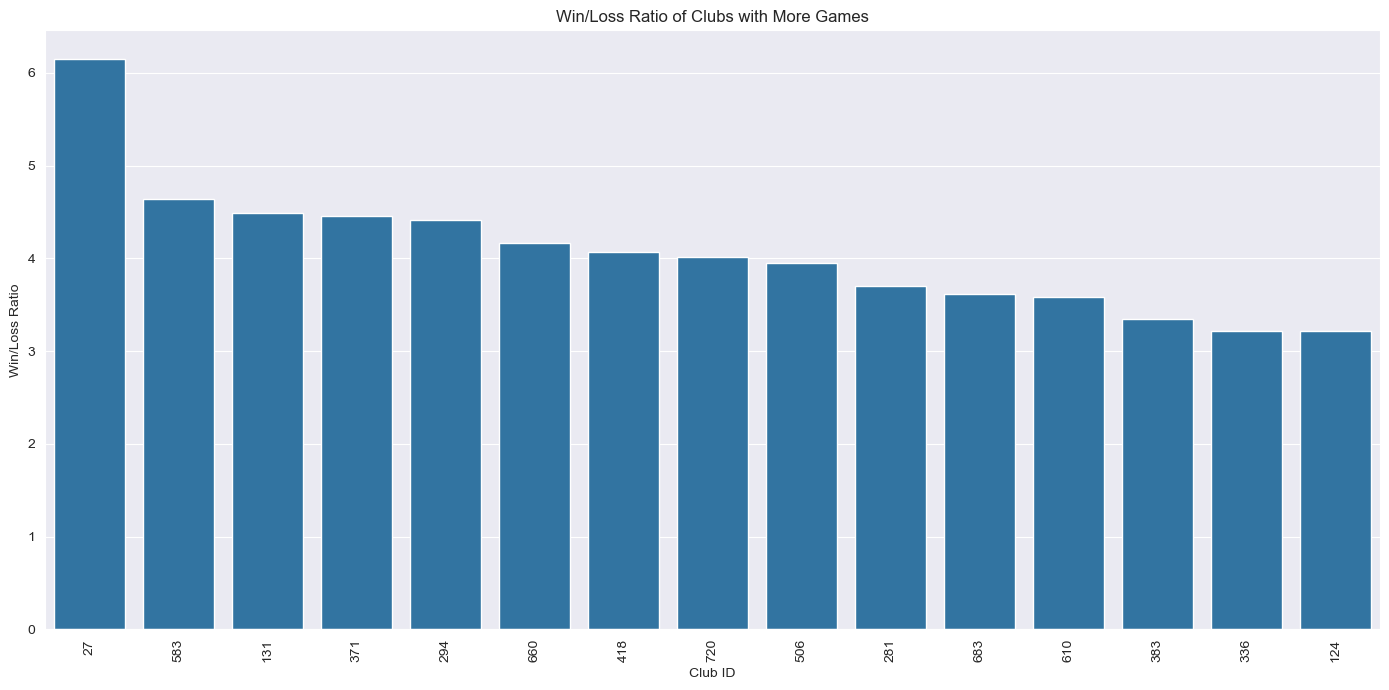

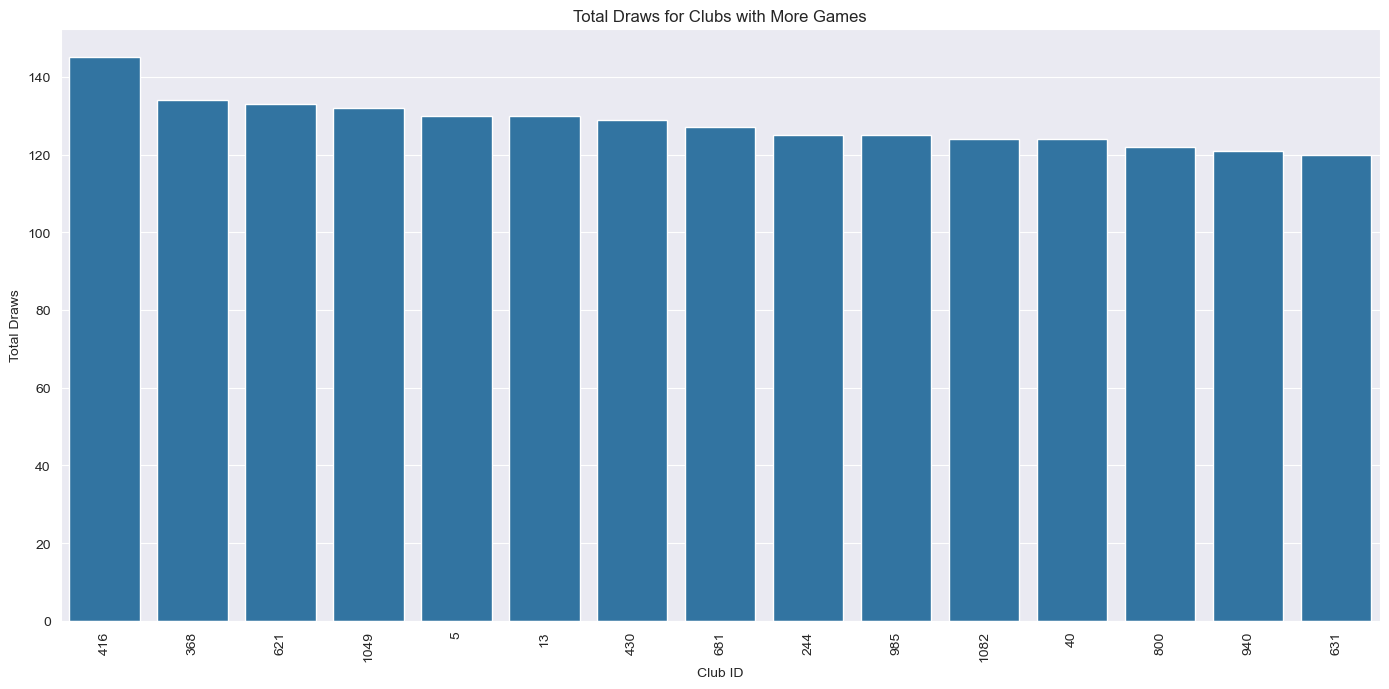

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the games data
games_df = dfs['games']

# Calculate total games, wins, draws, and losses for each club including away games
team_performance_home = games_df.groupby('home_club_id').agg(
    home_games=('date', 'count'),
    home_wins=('home_club_goals', lambda x: (x > games_df.loc[x.index, 'away_club_goals']).sum()),
    home_losses=('home_club_goals', lambda x: (x < games_df.loc[x.index, 'away_club_goals']).sum()),
    home_draws=('home_club_goals', lambda x: (x == games_df.loc[x.index, 'away_club_goals']).sum())
).reset_index()

print(team_performance_home)

team_performance_away = games_df.groupby('away_club_id').agg(
    away_games=('date', 'count'),
    away_wins=('away_club_goals', lambda x: (x > games_df.loc[x.index, 'home_club_goals']).sum()),
    away_losses=('away_club_goals', lambda x: (x < games_df.loc[x.index, 'home_club_goals']).sum()),
    away_draws=('away_club_goals', lambda x: (x == games_df.loc[x.index, 'home_club_goals']).sum())
).reset_index()

# Rename columns for clarity
team_performance_home.rename(columns={'home_club_id': 'club_id'}, inplace=True)
team_performance_away.rename(columns={'away_club_id': 'club_id'}, inplace=True)

# Merge the home and away performance dataframes
team_performance_combined = pd.merge(team_performance_home, team_performance_away, on='club_id', how='outer')

# Calculate total games, wins, draws, and losses
team_performance_combined['total_games'] = team_performance_combined['home_games'].fillna(0) + team_performance_combined['away_games'].fillna(0)
team_performance_combined['total_wins'] = team_performance_combined['home_wins'].fillna(0) + team_performance_combined['away_wins'].fillna(0)
team_performance_combined['total_losses'] = team_performance_combined['home_losses'].fillna(0) + team_performance_combined['away_losses'].fillna(0)
team_performance_combined['total_draws'] = team_performance_combined['home_draws'].fillna(0) + team_performance_combined['away_draws'].fillna(0)

# Calculate win/loss ratio
team_performance_combined['win_loss_ratio'] = team_performance_combined['total_wins'] / team_performance_combined['total_losses']

# Filter the dataframe for clubs with a higher number of total games to reduce the number of clubs
filtered_team_performance = team_performance_combined[team_performance_combined['total_games'] > team_performance_combined['total_games'].median()]



# Plotting the total wins and losses for the filtered clubs
plt.figure(figsize=(14, 7))
print(filtered_team_performance.sort_values('win_loss_ratio', ascending=False).head(15).sort_values('win_loss_ratio', ascending=False))
sns.barplot(x='club_id', y='win_loss_ratio', data=filtered_team_performance.sort_values('win_loss_ratio', ascending=False).head(15).sort_values('win_loss_ratio', ascending=False))
plt.title('Win/Loss Ratio of Clubs with More Games')
plt.xlabel('Club ID')
plt.ylabel('Win/Loss Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('win_loss_ratio_filtered.png')
plt.show()

# Plotting the total draws for the filtered clubs
plt.figure(figsize=(14, 7))
sns.barplot(x='club_id', y='total_draws', data=filtered_team_performance.sort_values('total_draws', ascending=False).head(15))
plt.title('Total Draws for Clubs with More Games')
plt.xlabel('Club ID')
plt.ylabel('Total Draws')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('total_draws_filtered.png')
plt.show()


                        _id first_name   last_name last_season  \
0  6574baf3975bb4cdf6a0071b       Timo  Hildebrand        2014   
1  6574baf3975bb4cdf6a0071d     Martin      Petrov        2012   
2  6574baf3975bb4cdf6a0073a     Martin     Amedick        2012   
3  6574baf3975bb4cdf6a007a2   Jermaine     Pennant        2013   
4  6574baf3975bb4cdf6a007ad     Damien        Duff        2013   

        player_code country_of_birth city_of_birth country_of_citizenship  \
0   timo-hildebrand          Germany         Worms                Germany   
1     martin-petrov         Bulgaria        Vratsa               Bulgaria   
2    martin-amedick          Germany     Paderborn                Germany   
3  jermaine-pennant          England    Nottingham                England   
4       damien-duff          Ireland    Ballyboden                Ireland   

  date_of_birth    sub_position    position   foot height_in_cm  \
0    1979-04-05      Goalkeeper  Goalkeeper  right          180   
1    1

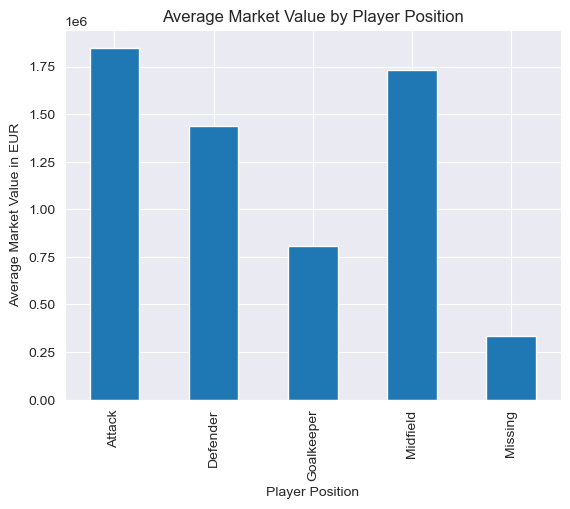

In [89]:

player_df = dfs['players']
print(player_df.head())
average_values = player_df.groupby('position')['market_value_in_eur'].mean()
print(set(player_df['position']))
# Step 3: Plot the results
average_values.plot(kind='bar')
plt.xlabel('Player Position')
plt.ylabel('Average Market Value in EUR')
plt.title('Average Market Value by Player Position')
plt.show()

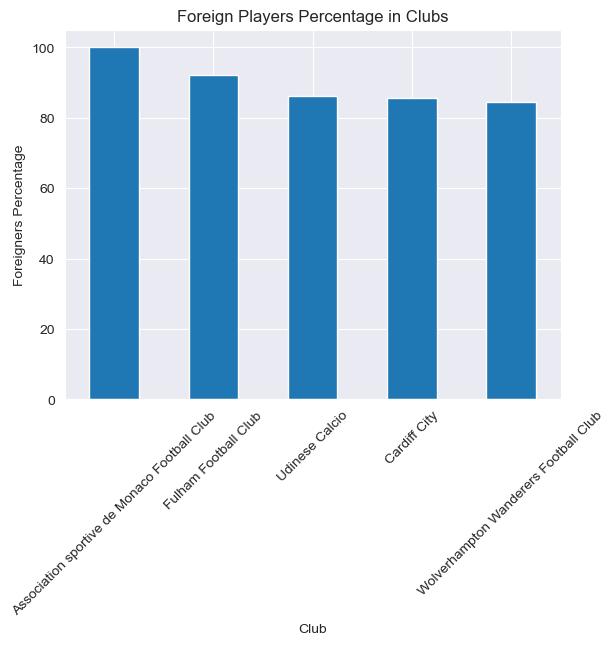

In [103]:
# strangers percentage for each club
clubs_df = dfs['clubs']
#column is foreigners_percentage
selected_clubs = clubs_df.sort_values("foreigners_percentage", ascending=False)[['name', 'foreigners_percentage']].iloc[0:5]

# Step 3: Plot the data
selected_clubs.set_index('name').plot(kind='bar', y='foreigners_percentage', legend=False)
plt.xlabel('Club')
plt.ylabel('Foreigners Percentage')
plt.title('Foreign Players Percentage in Clubs')
plt.xticks(rotation=45)
plt.show()